## Data Manipulation in R


## Assignment Objectives
By the end of this practical lab you will be able to:

* Create common objects used to store data
* Read tabular and spatial data formats into R
* Subset and merge data
* Manipulate data and calculate new values

## Matrix and Data Frames
Two main object types that can be used to store tabular data in R include the data frame and matrix. Data frames can contain input columns that are of multiple types (e.g. character, numeric etc); and a matrix a single type. You can create these within R manually or by reading in other common formats such as spreadsheets or csv files.

A data frame can be created using the data.frame() function.

In [5]:
#Create two vectors
a <- rep(2010:2017, each = 4) # this uses the rep() function to repeat values
b <- round(runif(32, 0, 40)) # runif can be used to generate random numbers - in this case between 0 and 40
#Create data frame
c <- data.frame(a,b)

You can type c into the console to return the whole data frame, however, you might just want to look at the top few rows. This can be achieved with the head() function:

<a id="data_frame_ex"></a>

In [6]:
#head returns the top six rows
head(c)

,a,b
,<int>,<dbl>
1,2010,18
2,2010,27
3,2010,18
4,2010,25
5,2011,21
6,2011,22


The matrix() function can be used as follows to create a tabular object of a single data type:

In [7]:

#Create a list of numbers
a <- 1:25 #The colon signifies a range
a

#Create a matrix with 5 rows and 5 columns
b <- matrix(a,nrow=5, ncol=5)
b

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25

1,6,11,16,21
2,7,12,17,22
3,8,13,18,23
4,9,14,19,24
5,10,15,20,25


It is possible to multiply a numeric matrix by a constant or another matrix

In [8]:
#Multiply b by 10
b*10
#Multiply b * b
b*b

10,60,110,160,210
20,70,120,170,220
30,80,130,180,230
40,90,140,190,240
50,100,150,200,250


1,36,121,256,441
4,49,144,289,484
9,64,169,324,529
16,81,196,361,576
25,100,225,400,625


When a matrix prints, the columns and rows show their index as a set of numbers within square brackets. These can be used to extract values from the matrix. These are formatted as [row number, column number]. For example:

In [9]:
#Extract first row
b[1,]
#Extract fourth column
b[,4]
#Extract third and fourth columns
b[,3:4] # The colon is used to define a numeric vector between the two numbers
#Extract first and fourth rows
b[c(1,5),] # The c() is used to create a numeric vector with the numbers separated by a comma
#Extract the value in the third row and fourth column
b[3,4]

[1]  1  6 11 16 21

[1] 16 17 18 19 20

11,16
12,17
13,18
14,19
15,20


1,6,11,16,21
5,10,15,20,25


[1] 18

In the data frame that you created [earlier](#data_frame_ex), the column and rows were not numbered, however, you can still use the square brackets to extract the values in the same way as a matrix. 

You can also reference the column names themselves using the $ symbol, for example:

In [10]:
#Return all the values in the column called "a"
c$a
#A different way of returning the column called "a"
c[,"a"]

[1] 2010 2010 2010 2010 2011 2011 2011 2011 2012 2012 2012 2012 2013 2013 2013
[16] 2013 2014 2014 2014 2014 2015 2015 2015 2015 2016 2016 2016 2016 2017 2017
[31] 2017 2017

[1] 2010 2010 2010 2010 2011 2011 2011 2011 2012 2012 2012 2012 2013 2013 2013
[16] 2013 2014 2014 2014 2014 2015 2015 2015 2015 2016 2016 2016 2016 2017 2017
[31] 2017 2017

We can also find out what a data frame column names are using the colnames() function:

In [11]:
colnames(c)

[1] "a" "b"

Or, we can also use the same function to set new column names:

In [12]:
colnames(c) <- c("Year","Count")

## Getting External Data into R

For most urban analytics you are more likely to be reading external data into R rather than creating data objects from scratch. Tabular data is commonly stored in text files such as CSV, or on spreadsheets; and explicitly spatial data will likely be stored in formats such as Shapefiles. In this section you will learn how to read data stored in these formats into R.

### Reading Tabular Data

A common way in which data can be stored externally are the the use of .csv files. These are text files, and have a very simple format where columns of attributes are separated by a comma [^1], and each row by a carriage return. 

[^1]: There are a range of different delimiter which can be used in addition to a comma, with the most common being tab; although sometimes characters not commonly used such as bar (|) will be used.

In the following example you will read in some U.S. Census Bureau, 2010-2014 American Community Survey (ACS) 5-Year Estimate data. This was downloaded from the [American Fact Finder](https://factfinder.census.gov) website. The data are for census tracts in San Francisco and relate to median earnings in the past 12 months.

Reading CSV files into R uses the read.csv() function:

In [13]:
#Install sf and terra
install.packages(c("sf", "terra"))

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [13]:
library(sf)
library(terra)

Linking to GEOS 3.12.1, GDAL 3.8.5, PROJ 9.4.0; sf_use_s2() is TRUE

terra 1.8.60



In [14]:
#Read CSV file - creates a data frame called earnings using sf
earnings <- read.csv("./data/ACS_14_5YR_S2001_with_ann.csv")
#Show column headings
colnames(earnings)

[1] "UID"        "pop"        "pop_m"      "earnings"   "earnings_m"

In [10]:
#Read CSV file - creates a data frame called earnings
earnings <- read.csv("./data/ACS_14_5YR_S2001_with_ann.csv")

#Show column headings
colnames(earnings)

#UID - Tract ID
#pop - estimated total population over 16 with income
#pop_m - estimated total population over 16 with income (margin of error)
#earnings - estimated median earnings
#earnings - estimated median earnings (margin of error)


[1] "UID"        "pop"        "pop_m"      "earnings"   "earnings_m"

It is possible to show the structure of the object using the str() function.
<a id="earnings"></a>

In [15]:
str(earnings)

'data.frame':	197 obs. of  5 variables:
 $ UID       : num  6.08e+09 6.08e+09 6.08e+09 6.08e+09 6.08e+09 ...
 $ pop       : int  2371 2975 2748 3668 1562 2172 2716 3173 3517 4030 ...
 $ pop_m     : int  226 315 324 442 198 374 315 338 258 521 ...
 $ earnings  : chr  "49954" "75984" "47586" "48931" ...
 $ earnings_m: chr  "15503" "10892" "10549" "6531" ...


This shows that the object is a data frame with 197 rows and 5 variables. For each of the attributes the class is shown (num = numeric; int = integer and Factor, with the number of levels). The read.csv() function guesses the column types when the data are read into R.

One issue you might notice is that the earnings and earnings_m variables have been read in as a Factor. The reason these columns were not read as integers (like the pop and pop_m) is the presence of two non-numeric values which are shown as "*" and "-". In ACS data these two symbols indicate that the sample sizes were either no sample observations or too few sample observations to make a calculation.

Issues such as these are quite common when reading in external data; and we will look at how this can be corrected later.

Not all tabular data are distributed as textfiles, and another very common format is Microsoft Excel format - .xls or xlsx. Unlike .csv files there are no built in function to read these formats, however, extension packages exist (e.g. XLConnect)

In [11]:
#Download and install package (make sure that you also have java installed - https://www.java.com/en/download/installed.jsp)
#install.packages("XLConnect")
!conda install conda-forge::r-openxlsx --yes

ERROR: Error in parse(text = input): <text>:3:8: unexpected symbol
2: #install.packages("XLConnect")
3: !conda install
          ^


In [16]:
install.packages("openxlsx") #added install package

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [17]:
#Load package
library(openxlsx)

The following code downloads an Excel File from the [London Data Store](https://data.london.gov.uk/) and then reads this into R.

In [18]:
download.file("https://data.london.gov.uk/download/number-bicycle-hires/ac29363e-e0cb-47cc-a97a-e216d900a6b0/tfl-daily-cycle-hires.xlsx",
              "./data/tfl-daily-cycle-hires.xlsx")

In [19]:
#Read workbook and Data sheet
cycle_hire <- read.xlsx("./data/tfl-daily-cycle-hires.xlsx", sheet = 2,)
cycle_hire

,"Please.note.that.from.01.August.2017.due.to.delayed.system.events,.daily.hire.figures.are.subject.to.small.incremental.changes..Figures.should.start.to.stabilise.after.a.2.week.period.",X2,X3,X4,X5,X6,X7,X8,X9,X10
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Daily Grand Total,144000182,Monthly Grand Total,144000182,Annual Grand Total,5293557,NA,NA,NA,NA
2,Day,Number of Bicycle Hires,Month,Number of Bicycle Hires,Year,Number of Bicycle Hires,Month,Average Hire Time (mins),Against last month,Against last year
3,40389,6897,40360,12461,2010,2180813,40360,17.232565604686624,NA,NA
4,40390,5564,40391,341203,2011,7142449,40391,16.551879672804755,NA,NA
5,40391,4303,40422,540859,2012,9519283,40422,15.219079279442516,NA,NA
6,40392,6642,40452,544412,2013,8045459,40452,15.204481165000038,NA,NA
7,40393,7966,40483,456304,2014,10023897,40483,13.776083488200854,NA,NA
8,40394,7893,40513,285574,2015,9871839,40513,16.820512371574448,NA,NA
9,40395,8724,40544,403178,2016,10303637,40544,16.093229293265011,NA,NA


### Reading Spatial Data

Spatial data are distributed in a variety of formats, but commonly as Shapefiles. These can be read into R using a number of packages, however, is illustrated here with "rgdal". The following code loads a Census Tract Shapefile which was downloaded from the [SF OpenData](https://data.sfgov.org/Geographic-Locations-and-Boundaries/Census-2010-Tracts-for-San-Francisco/rarb-5ahf/data).

In [17]:
#Download and install package
#install.packages("rgdal")

In [18]:
#Load package
library(rgdal)

# Read Shapefile
SF <- readOGR(dsn = "./data", layer = "tl_2010_06075_tract10")

Loading required package: sp

Please note that rgdal will be retired during October 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html and https://github.com/r-spatial/evolution
rgdal: version: 1.6-7, (SVN revision 1203)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.8.5, released 2024/04/02
Path to GDAL shared files: /srv/conda/envs/notebook/share/gdal
 GDAL does not use iconv for recoding strings.
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 9.4.0, March 1st, 2024, [PJ_VERSION: 940]
Path to PROJ shared files: /home/jovyan/.local/share/proj:/srv/conda/envs/notebook/share/proj
PROJ CDN enabled: TRUE
Linking to sp version:2.1-4
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading sp or rgdal.

Warning message:
“OGR support is provide

OGR data source with driver: ESRI Shapefile 
Source: "/home/jovyan/notebooks/data", layer: "tl_2010_06075_tract10"
with 197 features
It has 12 fields
Integer64 fields read as strings:  ALAND10 AWATER10 


This has created a SpatialPolygonsDataFrame Reading Spatial Data[^2] object and can view the tract boundaries using the plot() function:

[^2]: If a Shapefile containing points or lines imported into R, then these create SpatialPointsDataFrame or SpatialLinesDataFrame respectively.

<a id="SF_PLOT"></a>

In [22]:
library(sf)

Linking to GEOS 3.12.1, GDAL 3.8.5, PROJ 9.4.0; sf_use_s2() is TRUE



In [23]:
SF <- sf::read_sf("./data/tl_2010_06075_tract10.shp")

In [24]:
cat("CRS:", st_crs(SF)$input, "\n")
cat("Geometry type:", unique(st_geometry_type(SF)), "\n")
cat("Bounding box:\n")
print(st_bbox(SF))
cat("Number of features:", nrow(SF), "\n")

CRS: NAD83 
Geometry type: 4 
Bounding box:
      xmin       ymin       xmax       ymax 
-123.17382   37.63983 -122.28178   37.92982 
Number of features: 197 


In [25]:
summary(SF)

  STATEFP10          COUNTYFP10         TRACTCE10           GEOID10         
 Length:197         Length:197         Length:197         Length:197        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    NAME10           NAMELSAD10          MTFCC10           FUNCSTAT10       
 Length:197         Length:197         Length:197         Length:197        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

In [26]:
# prints class, features, and geometry info
st_geometry_type(SF)

[1] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
 [10] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
 [19] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
 [28] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
 [37] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
 [46] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
 [55] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
 [64] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
 [73] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
 [82] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
 [91] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
[100] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
[109] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
[118] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
[127] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
[136] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
[145] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
[154] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
[163] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
[172] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
[181] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
[190] POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON POLYGON
18 Levels: GEOMETRY POINT LINESTRING POLYGON MULTIPOINT ... TRIANGLE

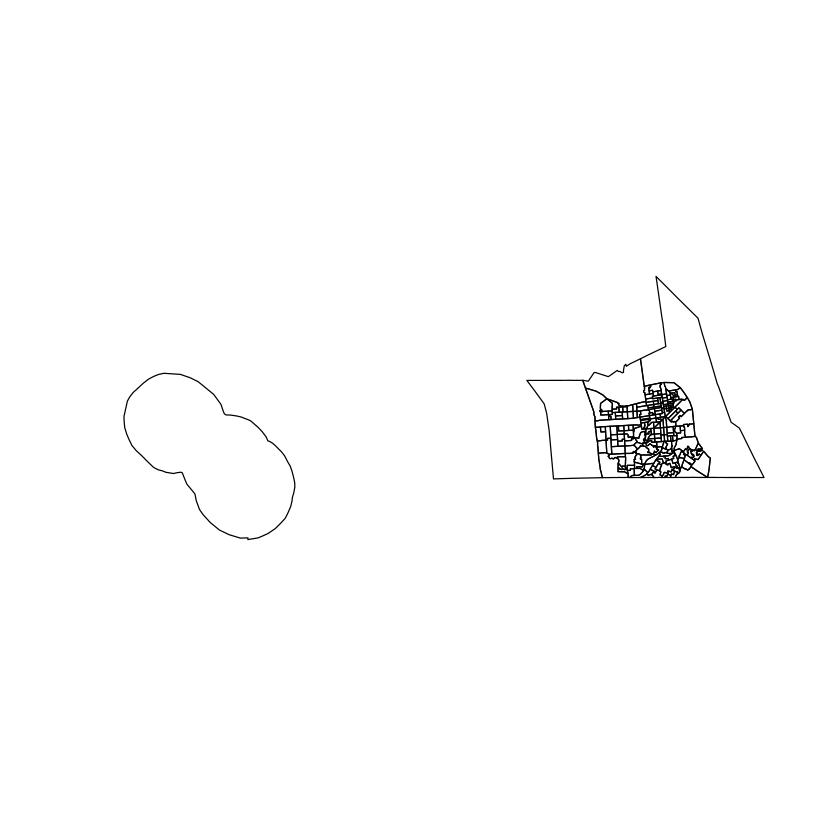

In [27]:
plot(st_geometry(SF))

Warning message:
“plotting the first 10 out of 12 attributes; use max.plot = 12 to plot all”


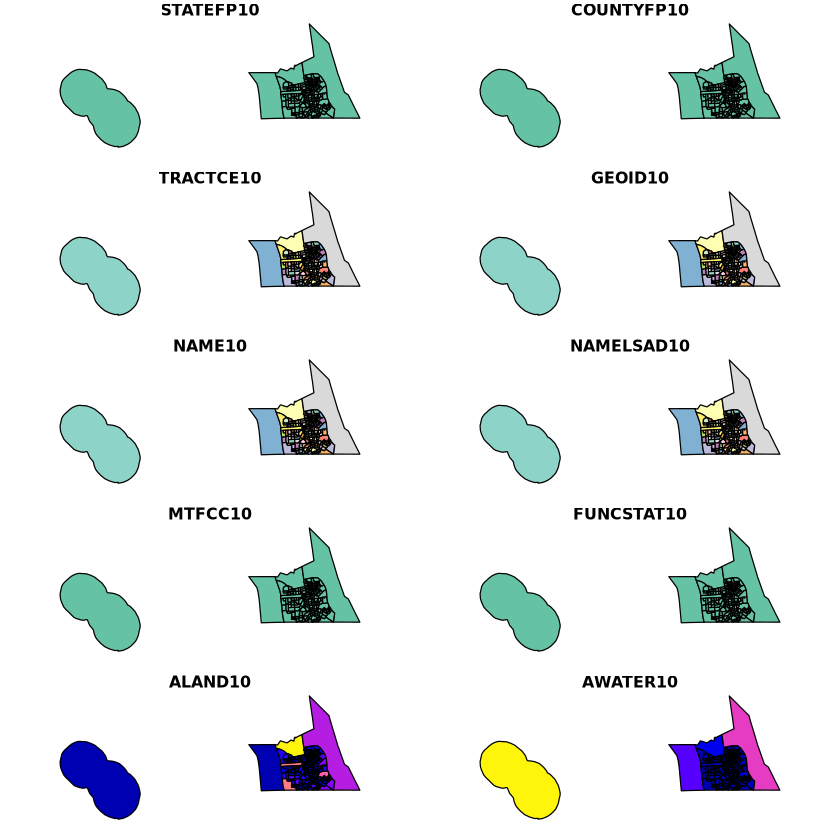

In [28]:
plot(SF)

The San Francisco peninsula is shown, however, the formal boundaries extend into the ocean and also include the Farallon Islands. For cartographic purposes it may not be desirable to show these extents, and later we will explore how these can be cleaned up.

A SpatialPolygonsDataFrame is an object that contains a series of 'slots' holding different items of data:

In [20]:
#. The slotNames() function prints their names.
slotNames(SF)

[1] "data"        "polygons"    "plotOrder"   "bbox"        "proj4string"

The objects stored within the slots can be accessed using the "@" symbol:

In [30]:
names(SF)

[1] "STATEFP10"  "COUNTYFP10" "TRACTCE10"  "GEOID10"    "NAME10"    
 [6] "NAMELSAD10" "MTFCC10"    "FUNCSTAT10" "ALAND10"    "AWATER10"  
[11] "INTPTLAT10" "INTPTLON10" "geometry"

In [31]:
#Show the top rows of the data object
print(head(SF))

Simple feature collection with 6 features and 12 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -122.4547 ymin: 37.77193 xmax: -122.4202 ymax: 37.78544
Geodetic CRS:  NAD83
# A tibble: 6 × 13
  STATEFP10 COUNTYFP10 TRACTCE10 GEOID10    NAME10 NAMELSAD10 MTFCC10 FUNCSTAT10
  <chr>     <chr>      <chr>     <chr>      <chr>  <chr>      <chr>   <chr>     
1 06        075        016500    060750165… 165    Census Tr… G5020   S         
2 06        075        016400    060750164… 164    Census Tr… G5020   S         
3 06        075        016300    060750163… 163    Census Tr… G5020   S         
4 06        075        016100    060750161… 161    Census Tr… G5020   S         
5 06        075        016000    060750160… 160    Census Tr… G5020   S         
6 06        075        015900    060750159… 159    Census Tr… G5020   S         
# ℹ 5 more variables: ALAND10 <dbl>, AWATER10 <dbl>, INTPTLAT10 <chr>,
#   INTPTLON10 <chr>, geometry <POLYGON [°]>


In [21]:
#Show the top rows of the data object
head(SF@data)

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,06,075,016500,06075016500,165,Census Tract 165,G5020,S,370459,0,+37.7741958,-122.4477884
1,06,075,016400,06075016400,164,Census Tract 164,G5020,S,309097,0,+37.7750995,-122.4369729
2,06,075,016300,06075016300,163,Census Tract 163,G5020,S,245867,0,+37.7760456,-122.4295509
3,06,075,016100,06075016100,161,Census Tract 161,G5020,S,368901,0,+37.7799831,-122.4286631
4,06,075,016000,06075016000,160,Census Tract 160,G5020,S,158236,0,+37.7823363,-122.4224838
5,06,075,015900,06075015900,159,Census Tract 159,G5020,S,295388,0,+37.7833400,-122.4293428


The "data" slot contains a data frame with a row of attributes for each of the spatial polygons contained within the SF object; thus, one each row equates to one polygon. Other slots contain useful information such as the spatial [projection](https://en.wikipedia.org/wiki/Spatial_reference_system).

### Creating Spatial Data

Sometimes it is necessary to create a spatial object from scratch, which is most common for point data given that only a single co-ordinate is required for each feature. This can be achieved using the SpatialPointsDataFrame() function and is used within this example to create a 311 point dataset. 311 data record non emergency calls within the US, and in this case are those which occurred within San Francisco between January and December 2016. The 311 data used here have been simplified from the [original](https://data.sfgov.org/City-Infrastructure/Case-Data-from-San-Francisco-311-SF311-/vw6y-z8j6/data) data to only a few variables, and those calls without spatial references have been removed.

<a id="point_plot"></a>

,CaseID,Category,Lat,Lon
,<int>,<chr>,<dbl>,<dbl>
1,6405492,Street Defects,37.82269,-122.3632
2,6590944,Sewer Issues,37.81054,-122.3634
3,5646247,Abandoned Vehicle,37.72862,-122.3647
4,5547584,Graffiti Public Property,37.72528,-122.3658
5,6407484,Street and Sidewalk Cleaning,37.72541,-122.3659
6,5503177,Temporary Sign Request,37.81994,-122.3663


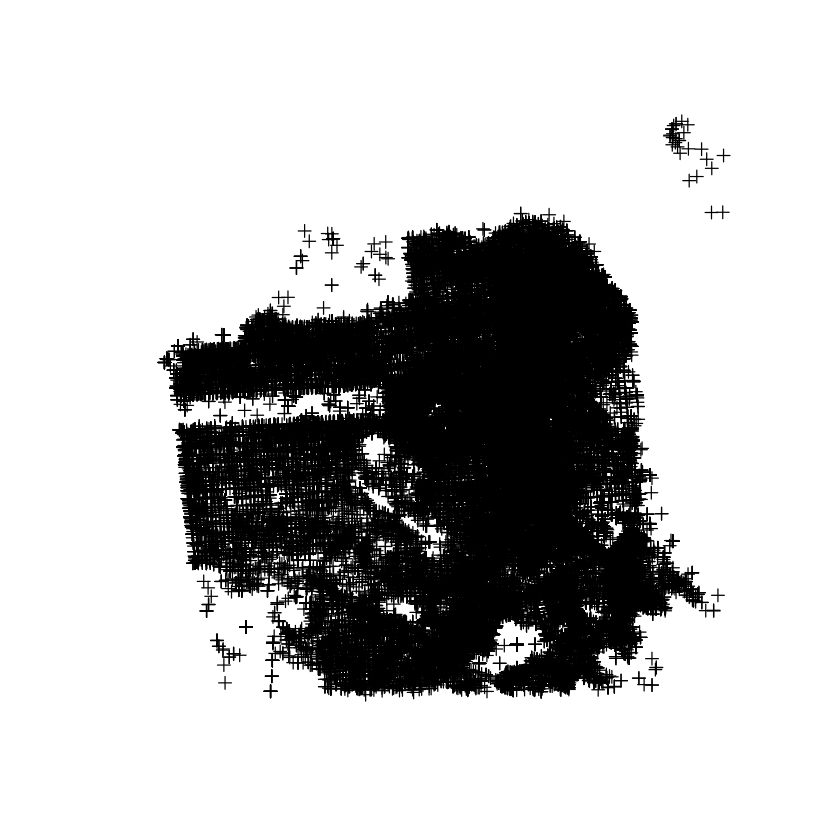

In [22]:
# Read csv into R
data_311 <- read.csv("./data/311.csv")
# Have a look at the structure
head(data_311)

# Create the SpatialPointsDataFrame
SP_311 <- SpatialPointsDataFrame(coords = data.frame(data_311$Lon, data_311$Lat), data = data.frame(data_311$CaseID,data_311$Category), proj4string = SF@proj4string)

# Show the results
plot(SP_311)


In [32]:
# Read csv into R
read_sf("./data/311.csv")

# Have a look at the structure
data_311 <- read.csv("./data/311.csv")

# Create the SpatialPointsDataFrame
SP_311 <- st_as_sf(data_311,coords = c("Lon","Lat"), crs = 4326)

CaseID,Category,Lat,Lon
<chr>,<chr>,<chr>,<chr>
6405492,Street Defects,37.82268769,-122.3631502
6590944,Sewer Issues,37.8105431,-122.3633696
5646247,Abandoned Vehicle,37.72861809,-122.3646709
5547584,Graffiti Public Property,37.72527763,-122.3658033
6407484,Street and Sidewalk Cleaning,37.72541079,-122.3658505
5503177,Temporary Sign Request,37.81994328,-122.3663381
5514170,Sewer Issues,37.81049584,-122.3664104
6450527,MUNI Feedback,37.82188408,-122.367711
5655235,Street and Sidewalk Cleaning,37.7253372,-122.3679682


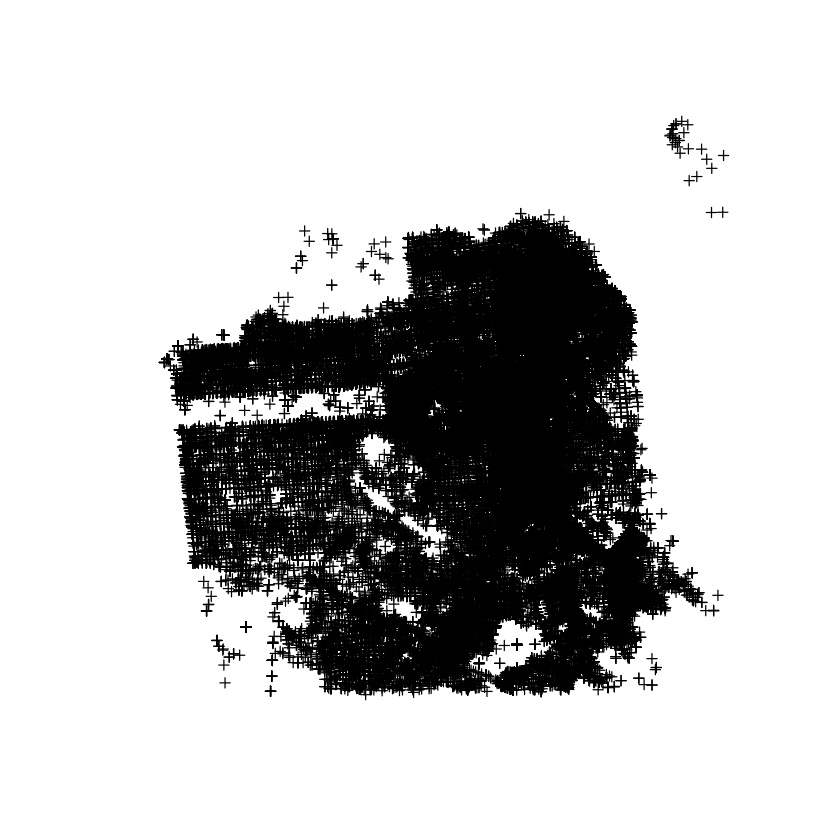

In [33]:
# Show the results
plot(st_geometry(SP_311),pch = 3, col = "black",cex = 0.8)

## Subsetting Data

It is often necessary to subset data; either restricting a data frame to a set of columns or rows; or in the case of spatial data, creating an extract for a particular set of geographic features. Subsetting can occur in a number of different ways

In [23]:
#Create a table of frequencies by the categories used within the 311 data
table(data_311$Category)

# Use the subset() function to extract rows from the data which relate to Sewer Issues
sewer_issues <- subset(data_311,Category == "Sewer Issues")

# Use the square brackets "[]" to perform the same task
sewer_issues <- data_311[data_311$Category == "Sewer Issues",]

# Extract a list of IDs for the "Sewer Issues"
sewer_issues_IDs <- subset(data_311,Category == "Sewer Issues", select = "CaseID")



        311 External Request            Abandoned Vehicle 
                         179                         5655 
  Blocked Street or SideWalk      Catch Basin Maintenance 
                         941                          161 
                  Color Curb             Damaged Property 
                         146                         1966 
      DPW Volunteer Programs             General Requests 
                           7                         5976 
   Graffiti Private Property     Graffiti Public Property 
                        7436                         9500 
            Illegal Postings    Interdepartmental Request 
                        1137                           90 
          Litter Receptacles                MUNI Feedback 
                        1552                         1928 
                Noise Report        Rec and Park Requests 
                         626                         1304 
Residential Building Request                 Sewer Issu

Subsetting can also be useful for spatial data. In the [example above](#SF_PLOT) the full extent of San Francisco was plotted, however, for cartographic purposes it may be preferable to remove the "Farallon Islands". This has a GEOID10 of "06075980401" which can be used to remove this from a plot:

In [35]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [36]:
# Frequency table of categories in the 311 data
table(data_311$Category)

# Subset data to include only Sewer Issues (using subset)
sewer_issues <- subset(data_311, Category == "Sewer Issues")

# Subset using square bracket notation
sewer_issues <- data_311[data_311$Category == "Sewer Issues", ]

# Extract list of CaseIDs for Sewer Issues (in sf format)
sewer_issues_ids <- data_311 |>
  filter(Category == "Sewer Issues") |>
  st_drop_geometry() |>
  select(CaseID)



        311 External Request            Abandoned Vehicle 
                         179                         5655 
  Blocked Street or SideWalk      Catch Basin Maintenance 
                         941                          161 
                  Color Curb             Damaged Property 
                         146                         1966 
      DPW Volunteer Programs             General Requests 
                           7                         5976 
   Graffiti Private Property     Graffiti Public Property 
                        7436                         9500 
            Illegal Postings    Interdepartmental Request 
                        1137                           90 
          Litter Receptacles                MUNI Feedback 
                        1552                         1928 
                Noise Report        Rec and Park Requests 
                         626                         1304 
Residential Building Request                 Sewer Issu

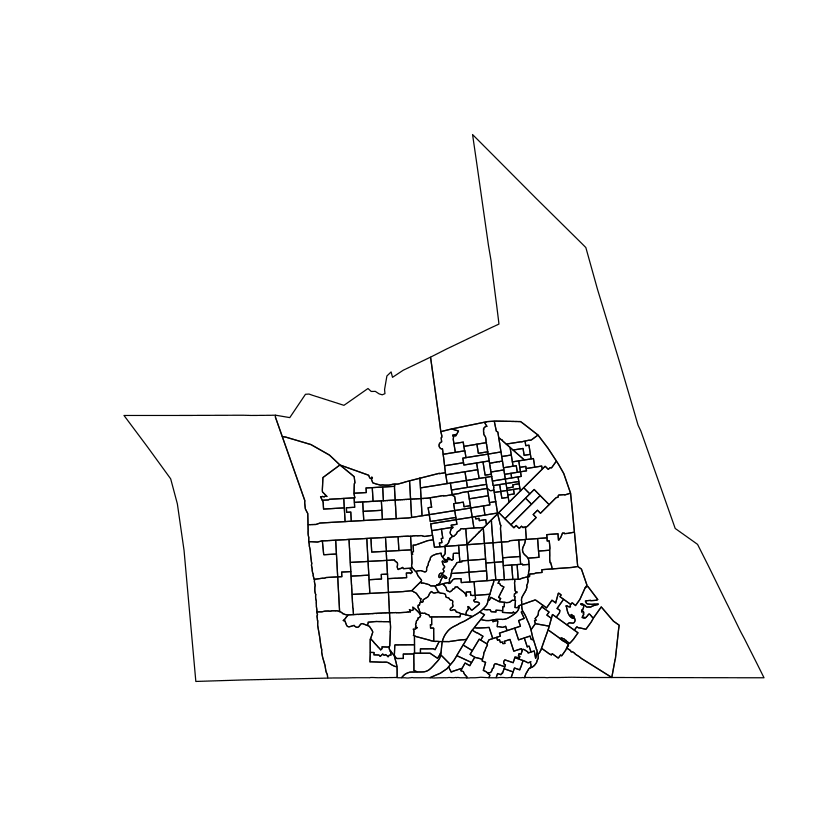

In [24]:
plot(SF[SF@data$GEOID10 != "06075980401",]) # Removes Farallon Islands from the plot

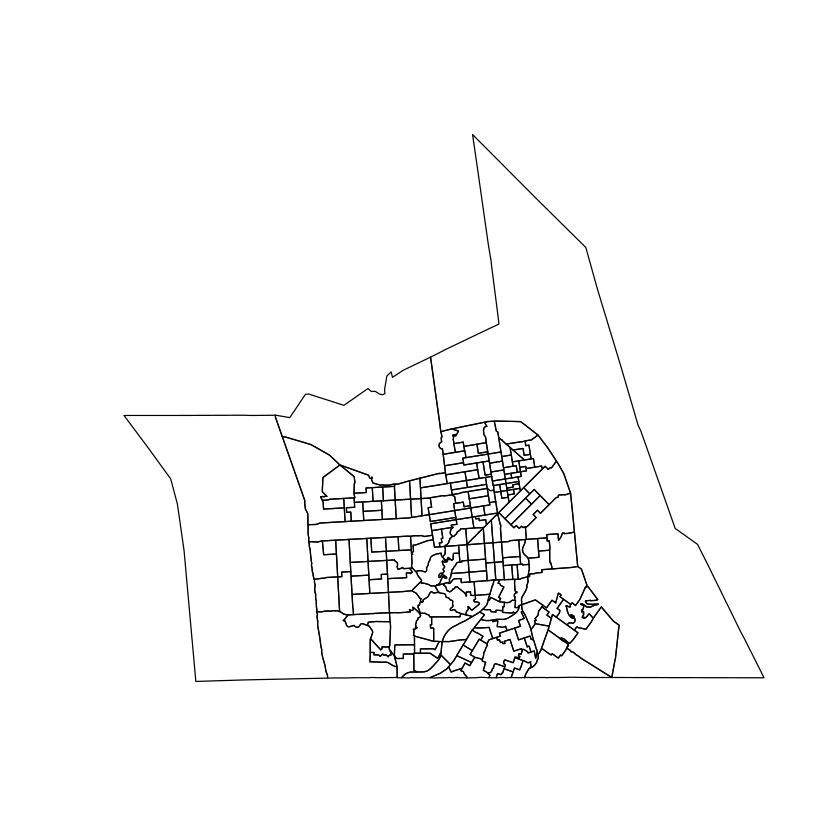

In [38]:
# Plot after filtering out GEOID10 == "06075980401" Removes Farallon Islands from the plot
plot(st_geometry(SF[SF$GEOID10 != "06075980401", ]))

This can also be quite useful if you want to plot only a single feature, for example:

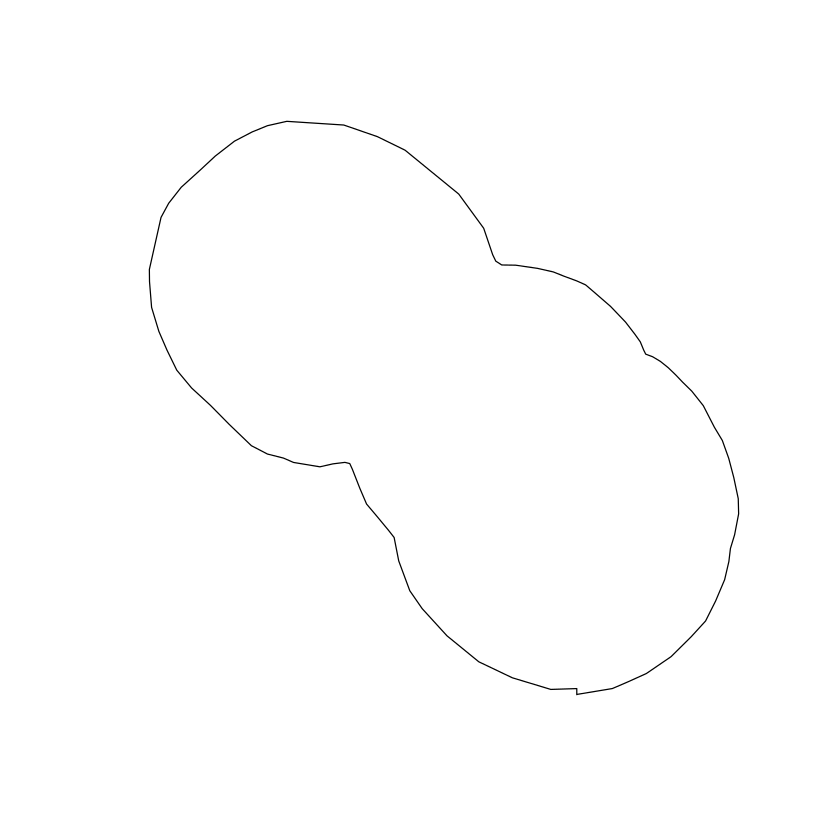

In [25]:
plot(SF[SF@data$GEOID10 == "06075980401",]) # Only plots Farallon Islands

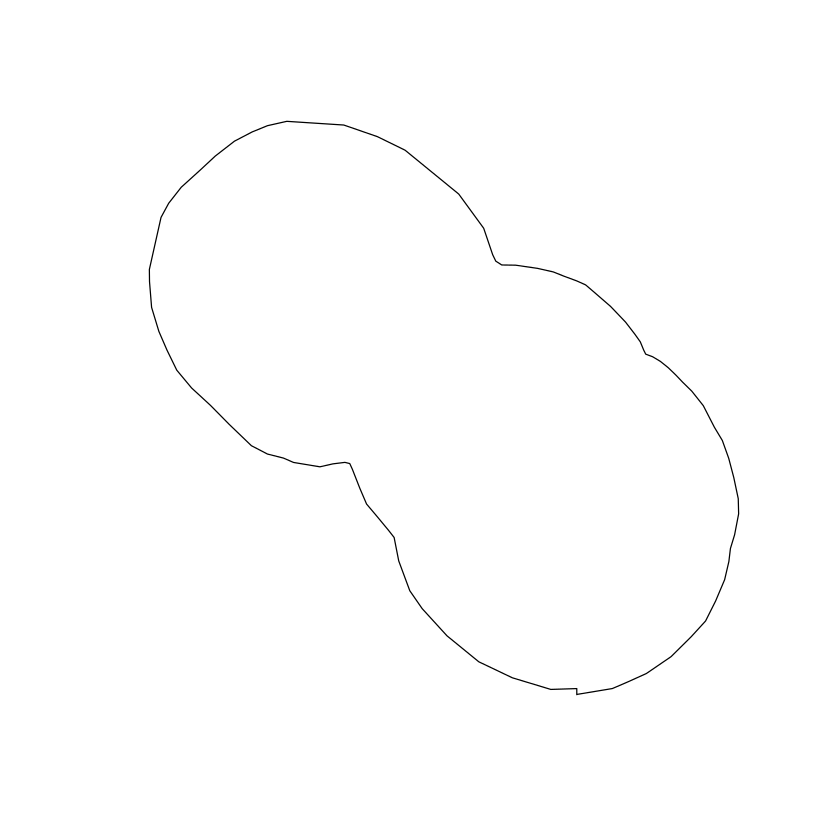

In [39]:
# Plot only Farallon Islands geometry
plot(st_geometry(SF[SF$GEOID10 == "06075980401", ]))

You can also use the same syntax to create a new object - for example:

In [26]:
SF <- SF[SF@data$GEOID10 != "06075980401",] # Overwrites the SF object

In [35]:
#load Library
library("raster")

Linking to GEOS 3.12.1, GDAL 3.8.5, PROJ 9.4.0; sf_use_s2() is TRUE



In [43]:
install.packages("sf")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [40]:
library(sf)

In [36]:
coast <- readOGR(dsn = "./Data/", layer = "./data/cb_2015_us_county_500k")

Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”


ERROR: Error in ogrInfo(dsn = dsn, layer = layer, encoding = encoding, use_iconv = use_iconv, : Cannot open data source


In [41]:
coast <- read_sf("./data/cb_2015_us_county_500k.shp") #using sf

In [50]:
library(sf)

In [42]:
# Convert both objects to sf if needed
SF <- st_as_sf(SF)
coast <- st_as_sf(coast)

# Make sure they use the same CRS
st_crs(SF)
st_crs(coast)

# If needed, align CRS
coast <- st_transform(coast, st_crs(SF))

# Now safely do the intersection
SF_clipped <- st_intersection(SF, coast)

Coordinate Reference System:
  User input: NAD83 
  wkt:
GEOGCRS["NAD83",
    DATUM["North American Datum 1983",
        ELLIPSOID["GRS 1980",6378137,298.257222101,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4269]]

Coordinate Reference System:
  User input: NAD83 
  wkt:
GEOGCRS["NAD83",
    DATUM["North American Datum 1983",
        ELLIPSOID["GRS 1980",6378137,298.257222101,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4269]]

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


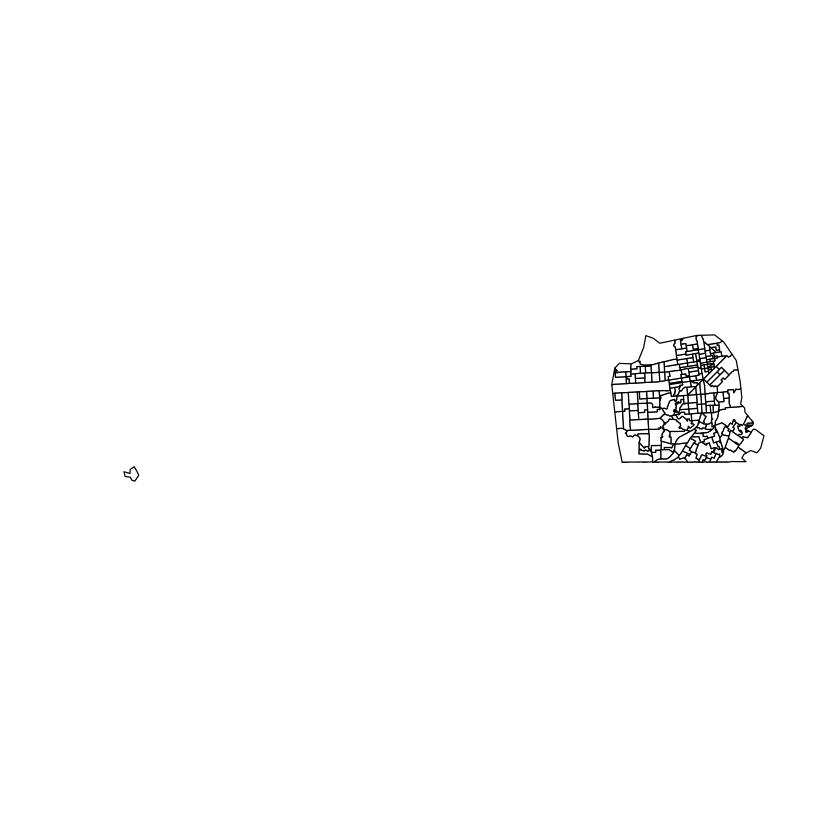

In [43]:
plot(st_geometry(SF_clipped), col = "white")

In [57]:
library(spatialEco)

ERROR: Error in library(spatialEco): there is no package called ‘spatialEco’


In [58]:
SP_311_PIP <- point.in.poly(SP_311, coast) #clip the SF spatial data fram object to the coastline

ERROR: Error in point.in.poly(SP_311, coast): could not find function "point.in.poly"


In [44]:
# Convert to sf if not already
SP_311 <- st_as_sf(SP_311)
coast <- st_as_sf(coast)

# Ensure both use the same CRS
coast <- st_transform(coast, st_crs(SP_311))

# Perform spatial join: keeps only points within the coast
SP_311_PIP <- st_join(SP_311, coast, join = st_within)

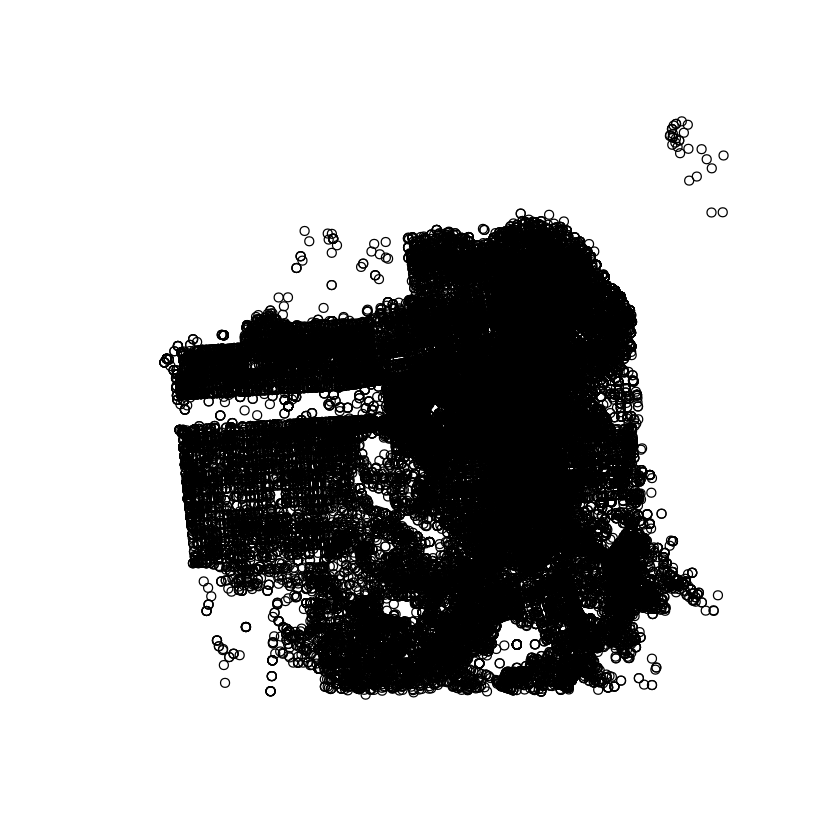

In [45]:
plot(st_geometry(SP_311_PIP))

In [ ]:
# Logical vector: which points are within the coast polygon
inside <- st_within(SP_311, coast, sparse = FALSE)[, 1]

# Subset only those points
SP_311_PIP <- SP_311[inside, ]

In [ ]:
plot(st_geometry(SP_311_PIP))

## Merging Tabular Data

So far we have utilized a single data frame or spatial object; however, it is often the case that in order to generate information, data from multiple sources are required. Where data share a common "key", these can be used to combine / link tables together. This might for example be an identifier for a zone; and is one of the reasons why most statistical agencies adopt a standard set of geographic codes to identify areas.

In the earlier imported data "earnings" this included a UID column which relates to a Tract ID. We can now import an additional data table called bachelors - this also includes the same ID.


In [27]:
#Read CSV file - creates a data frame called earnings
bachelors <- read.csv("./data/ACS_14_5YR_S1501_with_ann.csv")

#UID - Tract ID
#Bachelor_Higher - Bachelor degree or higher %
#Bachelor_Higher_m - Bachelor degree or higher % (margin of error)


Using the matching ID columns on both datasets we can link them together to create a new object with the merge() function:

In [28]:
#Perform the merge
SF_Tract_ACS <- merge(x=earnings,y=bachelors,by.x="UID",by.y="UID")
SF_Tract_ACS <- merge(earnings,bachelors,by="UID")# An alternative method to the above, but a shortened version as the ID columns are the same on both tables
#You can also use all.x=TRUE (or all.y=TRUE) to keep all the rows from either the x or y table - for more details type ?merge()
#The combined table now looks like
head(SF_Tract_ACS) # shows the top of the table

,UID,pop,pop_m,earnings,earnings_m,Bachelor_Higher,Bachelor_Higher_m
,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,6075010100,2371,226,49954,15503,44.3,19.5
2,6075010200,2975,315,75984,10892,58.8,30.8
3,6075010300,2748,324,47586,10549,48.8,13.2
4,6075010400,3668,442,48931,6531,35.9,26.1
5,6075010500,1562,198,110076,5331,39.2,33.7
6,6075010600,2172,374,22074,8666,34.1,23


## Removing and Creating Attributes

It is sometimes necessary to remove variables from a tabular object or to create new values. In the following example we will remove some unwanted columns in the SF_clipped object, leaving just the zone id for each polygon.

In [29]:
#Remind yourself what the data look like...
head(SF_clipped@data)

SF_clipped@data <- data.frame(SF_clipped@data[,"GEOID10"]) #Makes a new version of the @data slot with just the values of the GEOID10 column - this is wrapped with the data.frame() function

#The data frame within the data slot now looks as follows
head(SF_clipped)

ERROR: Error: object 'SF_clipped' not found


One thing you may not like on this new data frame is the column heading which has got a bit messy. We can clean this up using the colnames() function.

In [ ]:
colnames(SF_clipped@data) <- "GEOID10" #Update column names
head(SF_clipped@data) #Check the updated values

These tract ID are supposed to match with those in the "SF_Tract_ACS" object, however, if you are very observant you will notice that there is one issue; the above have a leading zero.

In [ ]:
head(SF_Tract_ACS) # show the top of the SF_Tract_ACS object

As such, in this instance we will create a new column on the SF_Tract_ACS data frame with a new ID that will match the SF GEOID10 column. We can achieve this using the $ symbol and will call this new variable "GEOID10".

In [ ]:
# Creates a new variable with a leading zero
SF_Tract_ACS$GEOID10 <- paste0("0",SF_Tract_ACS$UID)
head(SF_Tract_ACS)

If you remember from [earlier in this practical](#earnings), the earnings data had some values that were stored as factors rather than numeric or integers, and the same is true for both the bachelors data; and now the combined SF_Tract_ACS object. We can check this again as follows:

In [ ]:
str(SF_Tract_ACS)

We can also remove the UID column. A quick way of doing this for a single variable is to use "NULL":

In [ ]:
SF_Tract_ACS$UID <- NULL

We will now convert the factor variables to numerics. The first stage will be to remove the "-" and "**" characters from the variables with the gsub() function, replacing these with NA values. This also has the effect of converting the factors to characters.

In [ ]:
#Replace the "-" and "*" characters (If you are doing this outside of the US / UK and have a non English locale set, try running Sys.setlocale("LC_ALL","English") before using gsub)
SF_Tract_ACS$earnings <- gsub("-",NA,SF_Tract_ACS$earnings,fixed=TRUE) #replace the "-" values with NA
SF_Tract_ACS$earnings_m <- gsub("**",NA,SF_Tract_ACS$earnings_m,fixed=TRUE) #replace the "**" values with NA
SF_Tract_ACS$Bachelor_Higher <- gsub("-",NA,SF_Tract_ACS$Bachelor_Higher,fixed=TRUE) #replace the "-" values with NA
SF_Tract_ACS$Bachelor_Higher_m <- gsub("**",NA,SF_Tract_ACS$Bachelor_Higher_m,fixed=TRUE) #replace the "**" values with NA

We will now convert these to numeric values:

In [ ]:
SF_Tract_ACS$earnings <- as.numeric(SF_Tract_ACS$earnings)
SF_Tract_ACS$earnings_m <- as.numeric(SF_Tract_ACS$earnings_m)
SF_Tract_ACS$Bachelor_Higher <- as.numeric(SF_Tract_ACS$Bachelor_Higher)
SF_Tract_ACS$Bachelor_Higher_m <- as.numeric(SF_Tract_ACS$Bachelor_Higher_m )

Now all the variables other than the "GEOID10" are stored as integers or numerics:

In [ ]:
str(SF_Tract_ACS)

## Merging Spatial Data

It is also possible to join tabular data onto a spatial object (e.g. SpatialPolygonsDataFrame) in the same way as with regular data frames. In this example, we will join the newly created SF_Tract_ACS data onto the SF_clipped data frame. 

In [ ]:
SF_clipped <- merge(SF_clipped,SF_Tract_ACS, by="GEOID10") # merge
head(SF_clipped@data)#show the attribute data

### Spatial Joins

[Earlier in this practical](#point_plot) we created a SpatialPointDataFrame which we later cropped using the point.in.poly() function to create the "SP_311_PIP" object. As a reminder of what this looks like it is plotted below:

In [56]:
plot(SP_311_PIP)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'plot': object 'SP_311_PIP' not found


We will now clean up the associated data frame by removing all of the attributes apart from the category ("data_311.Category") and then add a sensible column name.

In [ ]:
SP_311_PIP@data <- data.frame(SP_311_PIP@data[,"data_311.Category"])#subset data
colnames(SP_311_PIP@data) <- "Category" #update column names

Although point.in.poly() was used to [clip a dataset to an extent earlier](#clippoint), the other really useful feature of this [point in polygon](https://en.wikipedia.org/wiki/Point_in_polygon) function is that it also appends the attributes of the polygon to the point. For example, we might be interested in finding out which census tracts each of the 311 calls resides within. As such, we will implement another point in polygon analysis to create a new object SF_clipped_311:

In [ ]:
SF_clipped_311 <- point.in.poly(SP_311_PIP, SF) # point in polygon
#Cleanup the attributes
SF_clipped_311@data <- SF_clipped_311@data[,c("GEOID10","Category")] #note that we don't need to use the data.frame() function as we are keeping more than one column
#Show the top rows of the data
head(SF_clipped_311@data)

## Writing out and saving your data

In order to share data it is often useful to write data frames or spatial objects back out of R as external files. This is very simple, and R supports multiple formats. In these examples, a CSV file and a Shapefile are both created.

In [ ]:
#In this example we write out a CSV file from the data slot of the SpatialPointsDataFrame SF_clipped_311
write.csv(SF_clipped_311@data,"311_Tract_Coded.csv")

This has created a CSV file "311_Tract_Coded.csv" in your working directory; we will use this in the next practical class - "Basic SQL".

It is also possible to write out a Shapefile 

In [ ]:
#This will write out a Shapefile for San Francisco - note, a warning is returned as the column names are a little longer than are allowed within a Shapefile and as such are automatically shortened.
writeOGR(SF_clipped, ".", "SF_clipped", driver="ESRI Shapefile")

# Further resources / training
* [R dplyr](https://www.datacamp.com/courses/dplyr-data-manipulation-r-tutorial) - An alternative method of manipulating data in R using the dplyr package